# Analyzing the effect of weather on policing

## Plotting the temperature
In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

* Read `weather.csv` into a DataFrame named weather.
* Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics using the `.describe()` method.
* Create a box plot to visualize the temperature columns.
* Display the plot.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


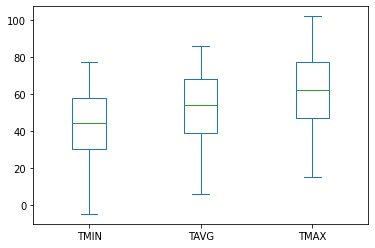

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('datasets/weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

Nice job! The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

## Plotting the temperature difference
In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

* Create a new column in the weather DataFrame named TDIFF that represents the difference between the maximum and minimum temperatures.
* Print the summary statistics for TDIFF using the `.describe()` method.
* Create a histogram with 20 bins to visualize TDIFF.
* Display the plot.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


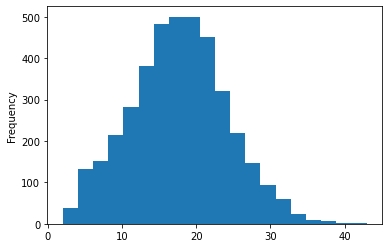

In [3]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

Great work! The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

## Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

* WT05 indicates "Hail"
* WT11 indicates "High or damaging winds"
* WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

* Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
* Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
* Replace any missing values in `bad_conditions` with a 0. (This has been done for you.)
* Create a histogram to visualize `bad_conditions`, and then display the plot.

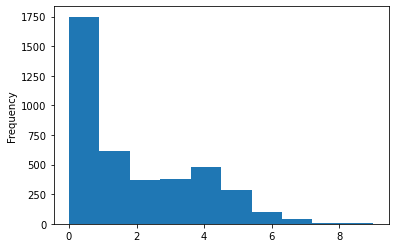

In [4]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

Excellent work! It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

## Rating the weather conditions
In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

* Convert 0 to 'good'
* Convert 1 through 4 to 'bad'
* Convert 5 through 9 to 'worse'
-----
* Count the unique values in the `bad_conditions` column and sort the index. (This has been done for you.)
* Create a dictionary called mapping that maps the `bad_conditions` integers to the specified strings.
* Convert the `bad_conditions` integers to strings using the mapping and store the results in a new column called rating.
* Count the unique values in rating to verify that the integers were properly converted to strings.

In [5]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Nice job! This rating system should make the weather condition data easier to understand.

## Changing the data type to category
Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

* Create a CategoricalDtype object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'. Make sure to specify that the categories should be treated as ordered.
* Use the cats object to change the data type of the rating column from object to category.
* Examine the head of the rating column to confirm that the categories are logically ordered.

In [6]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


Excellent! You'll use the rating column in future exercises to analyze the effects of weather on police behavior.

## Preparing the DataFrames
In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
2. With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.

* Reset the index of the ri DataFrame.
* Examine the head of ri to verify that `stop_datetime` is now a DataFrame column, and the index is now the default integer index.
* Create a new DataFrame named `weather_rating` that contains only the DATE and rating columns from the weather DataFrame.
* Examine the head of `weather_rating` to verify that it contains the proper columns.

In [8]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('datasets/police.csv')

# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   index state   stop_date stop_time  county_name driver_gender driver_race  \
0      0    RI  2005-01-04     12:55          NaN             M       White   
1      1    RI  2005-01-23     23:15          NaN             M       White   
2      2    RI  2005-02-17     04:15          NaN             M       White   
3      3    RI  2005-02-20     17:15          NaN             M       White   
4      4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_relate

Great work! The ri and weather_rating DataFrames are now ready to be merged.

## Merging the DataFrames
In this exercise, you'll merge the ri and `weather_rating` DataFrames into a new DataFrame, `ri_weather`.

The DataFrames will be joined using the stop_date column from ri and the DATE column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

* Examine the shape of the ri DataFrame.
* Merge the ri and `weather_rating` DataFrames using a left join.
* Examine the shape of `ri_weather` to confirm that it has two more columns but the same number of rows as ri.
* Replace the index of `ri_weather` with the `stop_datetime` column.

In [13]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_time', inplace=True)

(91741, 16)
(91741, 18)


Fantastic! In the next section, you'll use ri_weather to analyze the relationship between weather conditions and police behavior.

## Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Let's find out!

* First, you'll calculate the overall arrest rate.
* Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
* Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, `good < bad < worse`, they will be sorted that way in the results.

* Calculate the overall arrest rate by taking the mean of the `is_arrested` Series.

In [14]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.03556777868937704


* Calculate the arrest rate for each weather rating using a `.groupby()`.

In [15]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033712
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


* Calculate the arrest rate for each combination of violation and rating. How do the arrest rates differ by group?

In [16]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

## Selecting from a multi-indexed Series
The output of a single `.groupby()` operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

* The outer index level is like the DataFrame rows.
* The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the `.loc[]` accessor.

* Save the output of the `.groupby()` operation from the last exercise as a new object, `arrest_rate`. (This has been done for you.)
* Print the `arrest_rate` Series and examine it.
* Print the arrest rate for moving violations in bad weather.
* Print the arrest rates for speeding violations in all three weather conditions.

In [18]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


Great job! The .loc[ ] accessor is a powerful and flexible tool for data selection.

## Reshaping the arrest rate data
In this exercise, you'll start by reshaping the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

* Unstack the `arrest_rate` Series to reshape it into a DataFrame.
* Create the exact same DataFrame using a pivot table! Each of the three `.pivot_table()` parameters should be specified as one of the `ri_weather` columns.

In [19]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886


Excellent work! In the future, when you need to create a DataFrame like this, you can choose whichever method makes the most sense to you.